In [1]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import matplotlib.ticker as ticker
from sklearn import preprocessing

In [2]:
df = pd.read_csv('iris.csv')
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Label
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Label          150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None


array([[<Axes: title={'center': 'SepalLengthCm'}>]], dtype=object)

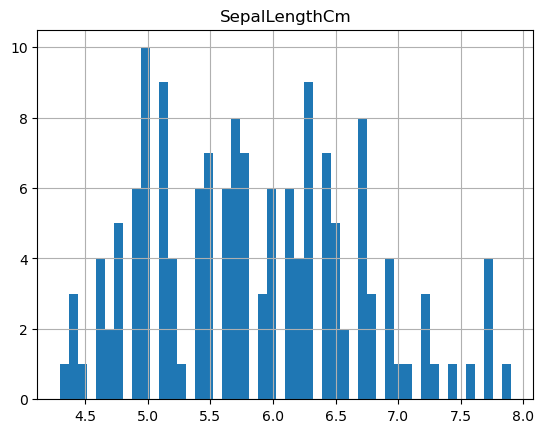

In [5]:
df.hist(column='SepalLengthCm', bins=50)

In [6]:
df[45:55]

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Label
45,4.8,3.0,1.4,0.3,Iris-setosa
46,5.1,3.8,1.6,0.2,Iris-setosa
47,4.6,3.2,1.4,0.2,Iris-setosa
48,5.3,3.7,1.5,0.2,Iris-setosa
49,5.0,3.3,1.4,0.2,Iris-setosa
50,7.0,3.2,4.7,1.4,Iris-versicolor
51,6.4,3.2,4.5,1.5,Iris-versicolor
52,6.9,3.1,4.9,1.5,Iris-versicolor
53,5.5,2.3,4.0,1.3,Iris-versicolor
54,6.5,2.8,4.6,1.5,Iris-versicolor


In [7]:
df0 = df[:50]
df1 = df[50:100]
df2 = df[100:]

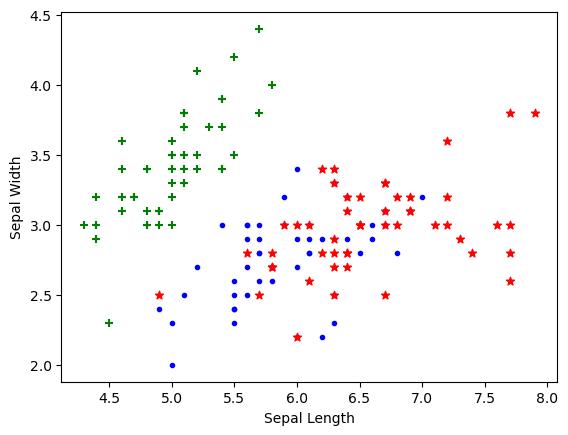

In [10]:
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.scatter(df0['SepalLengthCm'], df0['SepalWidthCm'],color="green",marker='+')
plt.scatter(df1['SepalLengthCm'], df1['SepalWidthCm'],color="blue",marker='.')
plt.scatter(df2['SepalLengthCm'], df2['SepalWidthCm'],color="red",marker='*')

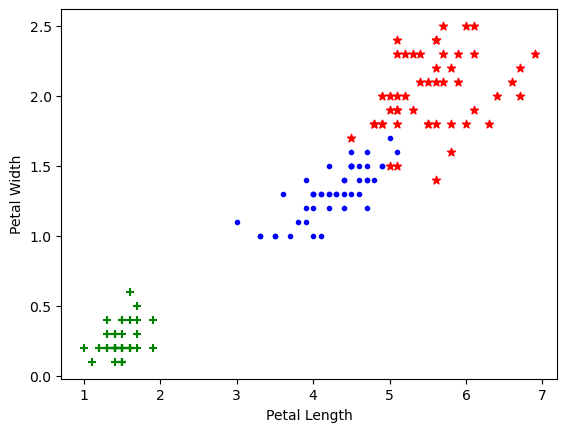

In [11]:
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.scatter(df0['PetalLengthCm'], df0['PetalWidthCm'],color="green",marker='+')
plt.scatter(df1['PetalLengthCm'], df1['PetalWidthCm'],color="blue",marker='.')
plt.scatter(df2['PetalLengthCm'], df2['PetalWidthCm'],color="red",marker='*')

In [12]:
import seaborn as sns

C:\Users\USER\AppData\Local\Temp\ipykernel_21584\1738947012.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot = True)


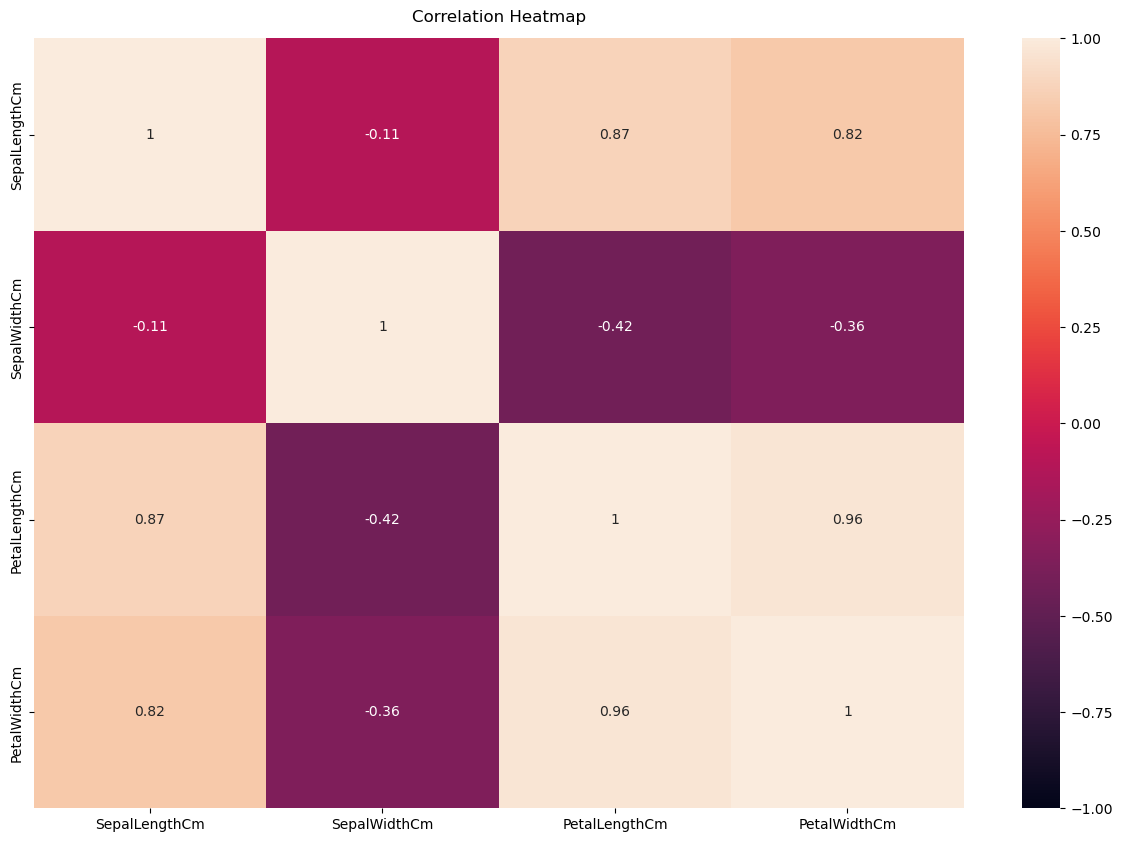

In [13]:
# menentukan ukuran plot
plt.figure(figsize=(15, 10))
# membuat korelasi heatmap
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot = True)
# menentukan format plot (judul, ukuran text)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

In [14]:
X = df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']] .values  #.astype(float)
X[0:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [15]:
y = df['Label'].values
y[0:5]

array(['Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa'], dtype=object)

In [16]:
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
X[0:5]

array([[-0.90068117,  1.03205722, -1.3412724 , -1.31297673],
       [-1.14301691, -0.1249576 , -1.3412724 , -1.31297673],
       [-1.38535265,  0.33784833, -1.39813811, -1.31297673],
       [-1.50652052,  0.10644536, -1.2844067 , -1.31297673],
       [-1.02184904,  1.26346019, -1.3412724 , -1.31297673]])

In [17]:
#membagi dataset menjadi subset data latih (train) dan subset data uji (test) secara acak
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( 
    X, y, test_size=0.2, random_state=4
)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (120, 4) (120,)
Test set: (30, 4) (30,)


In [18]:
from sklearn.neighbors import KNeighborsClassifier

In [20]:
k = 4
#Train Model and Predict
knn = KNeighborsClassifier(n_neighbors = k)
knn.fit(X_train,y_train)
knn

KNeighborsClassifier(n_neighbors=4)

In [21]:
yhat = knn.predict(X_test)
yhat[0:5]

array(['Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica'], dtype=object)

In [22]:
from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y_train, knn.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

Train set Accuracy:  0.9666666666666667
Test set Accuracy:  0.9333333333333333


In [23]:
from sklearn.metrics import confusion_matrix
y_pred = knn.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
cm

array([[16,  0,  0],
       [ 0,  4,  1],
       [ 0,  1,  8]], dtype=int64)

Text(58.222222222222214, 0.5, 'Truth')

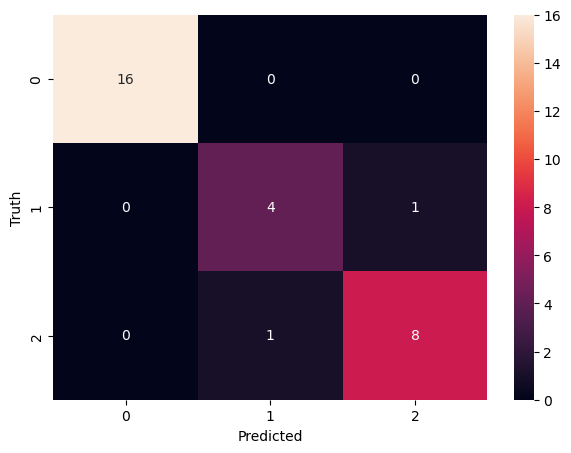

In [25]:
plt.figure(figsize=(7,5))
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [26]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        16
Iris-versicolor       0.80      0.80      0.80         5
 Iris-virginica       0.89      0.89      0.89         9

       accuracy                           0.93        30
      macro avg       0.90      0.90      0.90        30
   weighted avg       0.93      0.93      0.93        30



In [27]:
import pickle

filename = 'trainmodel.sav'
pickle.dump(knn, open(filename, 'wb'))

In [29]:
loaded_model = pickle.load(open('trainmodel.sav', 'rb'))
loaded_model.fit(X_train, y_train)

y_pred = loaded_model.predict(X_test)
print("Train set Accuracy: ", metrics.accuracy_score(y_train, knn.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

Train set Accuracy:  0.9666666666666667
Test set Accuracy:  0.9333333333333333
